In [45]:
import torch
import torchvision

import matplotlib.pyplot as plt

In [46]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

BATCH_SIZE = 64

In [47]:
train_data = torchvision.datasets.MNIST('./data', train=True, transform=transform)
test_data = torchvision.datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, BATCH_SIZE)

In [48]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.disc = torch.nn.Sequential(
            # 1,28,28 
            torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),

            # 16, 14, 14
            torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            # 32, 7, 7
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # 64,1,1
            torch.nn.Flatten(),
            torch.nn.Linear(64, 1), # fake or real
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)

In [49]:
Z_DIM = 64

In [50]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.gen = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(Z_DIM, 32, 7), # 32, 7, 7
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            torch.nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # 16, 14, 14 
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),

            torch.nn.ConvTranspose2d(16, 1, 3, 2, 1, 1), # 1, 28, 28
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        return self.gen(x)

In [ ]:
discriminator = Discriminator()
generator = Generator()

optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.001)
optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.001)

epochs = 10

criterion = torch.nn.BCELoss()

In [56]:
def show_generated_images(generator, epoch, Z_DIM, n_images=16):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(n_images, Z_DIM, 1, 1)
        fake_images = generator(z).cpu()

    grid_img = torchvision.utils.make_grid(fake_images, nrow=10, normalize=True)
    plt.figure(figsize=(6,6))
    plt.title(f"Generated Images at Epoch {epoch}")
    plt.axis('off')
    plt.imshow(grid_img.permute(1, 2, 0))  # CxHxW -> HxWxC
    plt.show()
    generator.train()


Epoch [1/2] Batch [0/938] Loss D: 0.1727Loss G: 3.2603


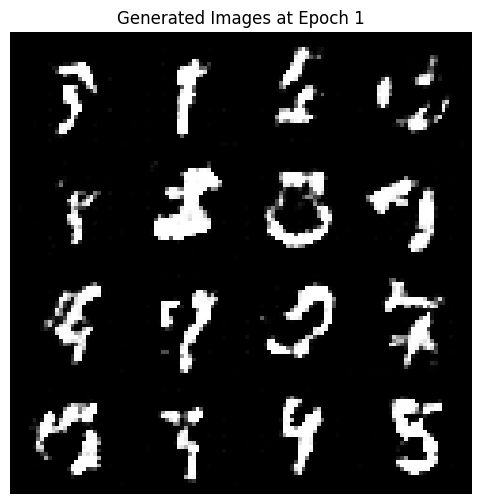

Epoch [1/2] Batch [200/938] Loss D: 0.2641Loss G: 3.3301


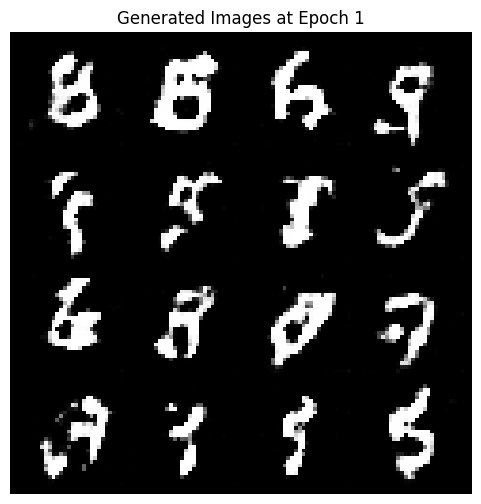

Epoch [1/2] Batch [400/938] Loss D: 0.2330Loss G: 3.8626


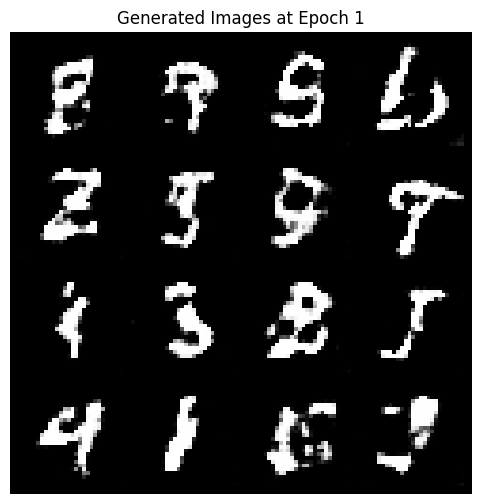

Epoch [1/2] Batch [600/938] Loss D: 0.1560Loss G: 4.5321


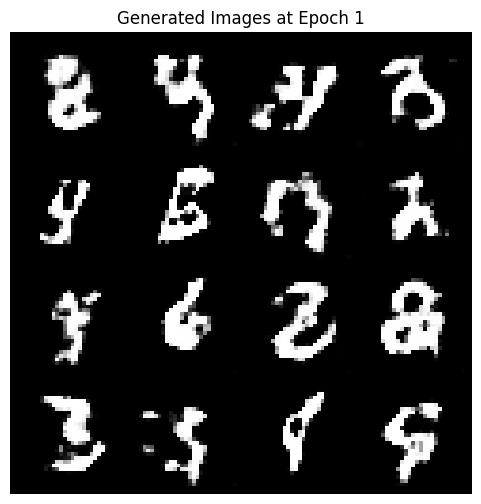

Epoch [1/2] Batch [800/938] Loss D: 0.1396Loss G: 3.1297


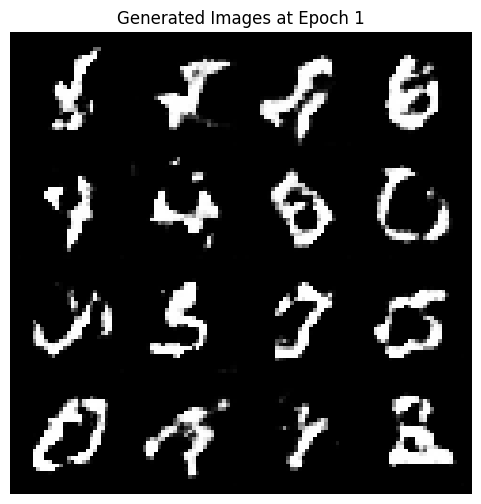

Epoch [2/2] Batch [0/938] Loss D: 0.1704Loss G: 3.6817


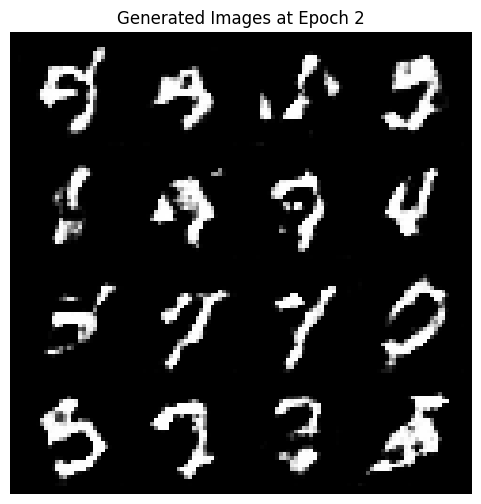

Epoch [2/2] Batch [200/938] Loss D: 0.1222Loss G: 4.1000


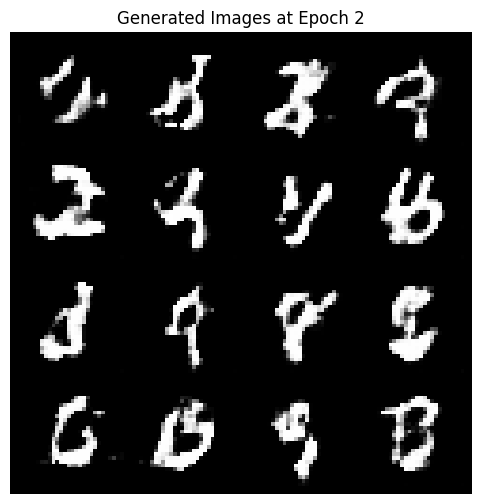

Epoch [2/2] Batch [400/938] Loss D: 0.2425Loss G: 3.2817


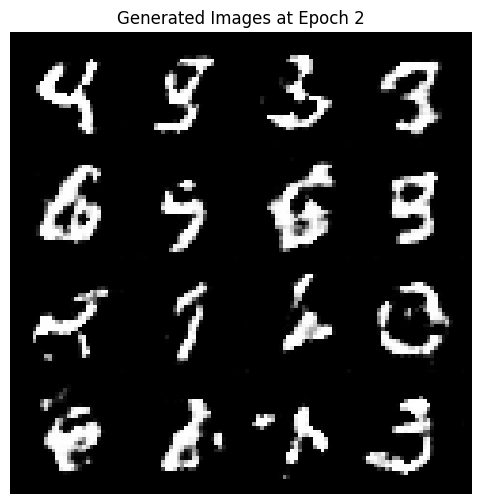

Epoch [2/2] Batch [600/938] Loss D: 0.1032Loss G: 3.6874


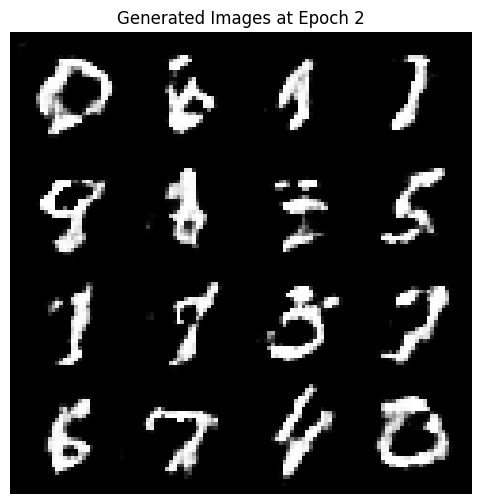

Epoch [2/2] Batch [800/938] Loss D: 0.1226Loss G: 4.0416


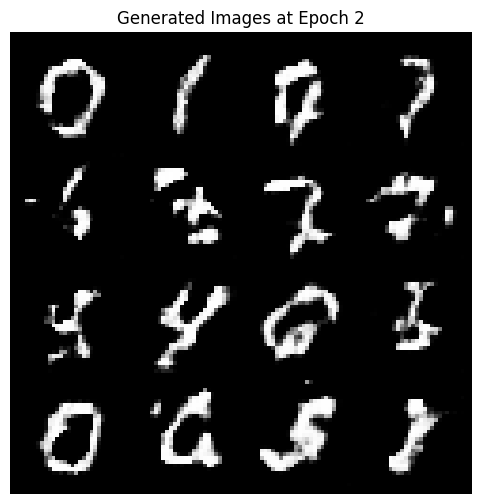

Epoch [3/2] Batch [0/938] Loss D: 0.1669Loss G: 4.7744


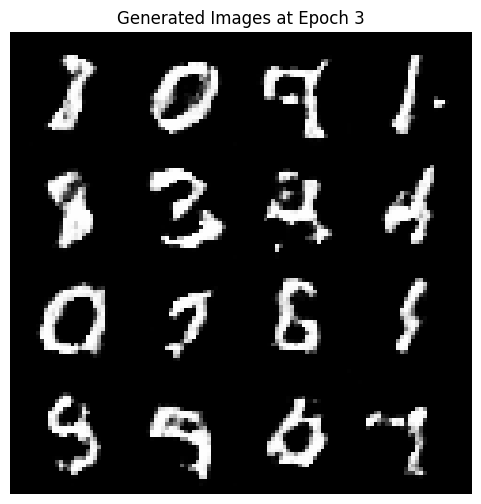

Epoch [3/2] Batch [200/938] Loss D: 0.1277Loss G: 3.9646


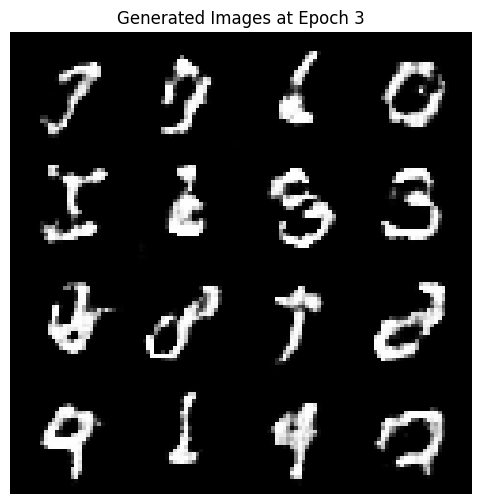

Epoch [3/2] Batch [400/938] Loss D: 0.2120Loss G: 4.8331


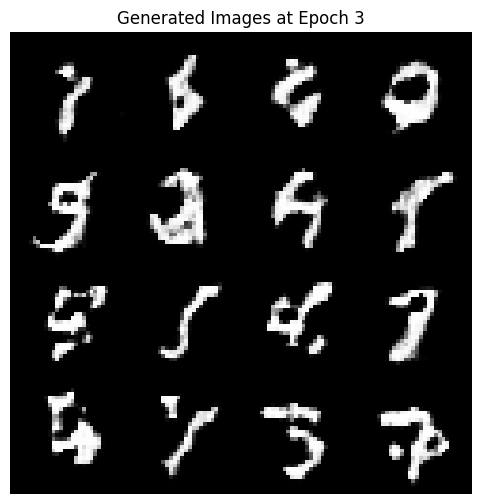

Epoch [3/2] Batch [600/938] Loss D: 0.1649Loss G: 5.2687


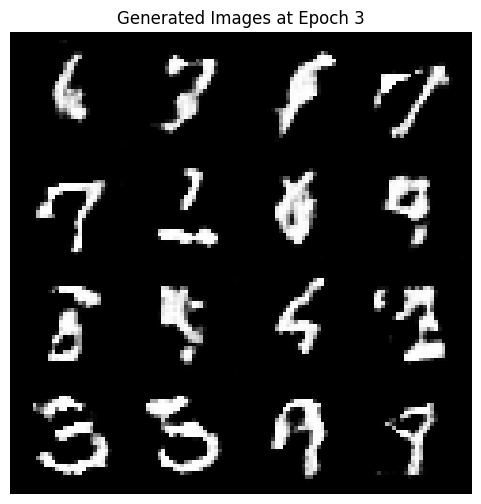

Epoch [3/2] Batch [800/938] Loss D: 0.0918Loss G: 4.3666


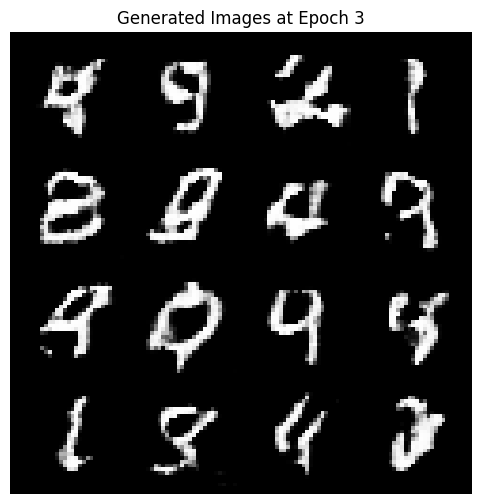

Epoch [4/2] Batch [0/938] Loss D: 0.2682Loss G: 4.9712


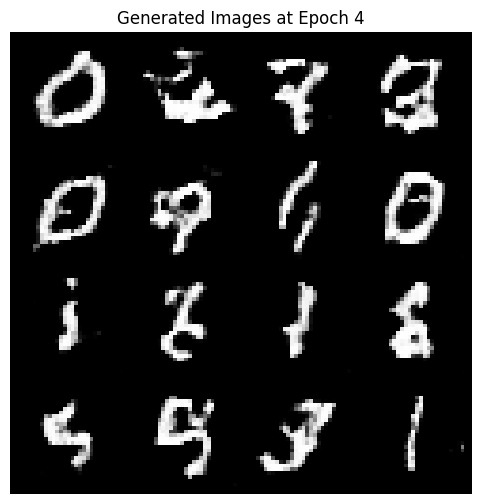

Epoch [4/2] Batch [200/938] Loss D: 0.0729Loss G: 5.0101


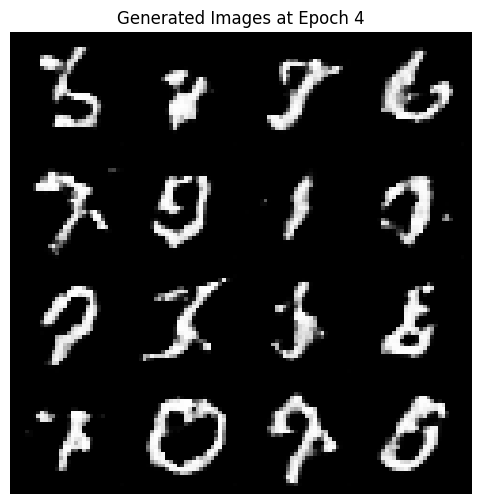

Epoch [4/2] Batch [400/938] Loss D: 0.2535Loss G: 4.7842


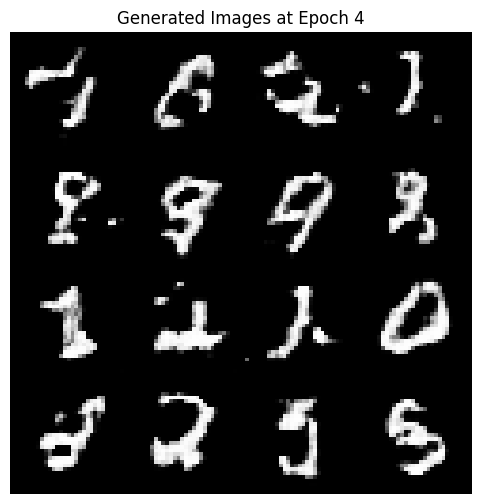

Epoch [4/2] Batch [600/938] Loss D: 0.0876Loss G: 4.3961


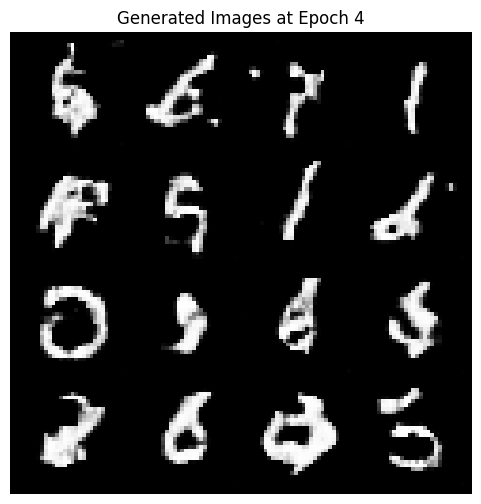

Epoch [4/2] Batch [800/938] Loss D: 0.0751Loss G: 4.2119


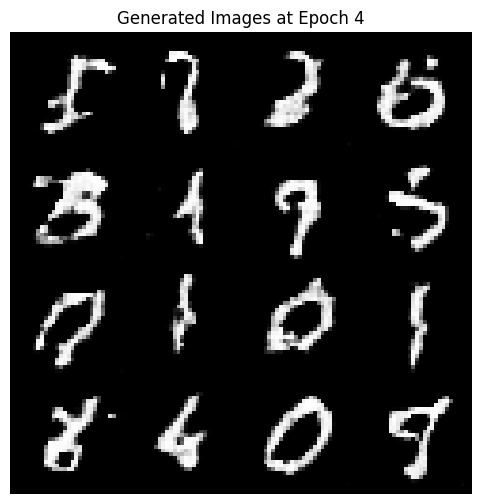

Epoch [5/2] Batch [0/938] Loss D: 0.1318Loss G: 4.2976


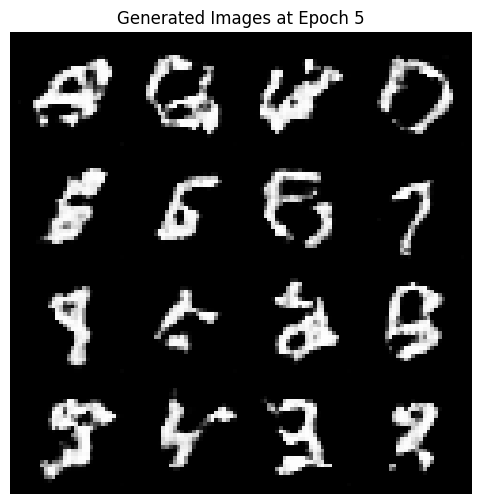

Epoch [5/2] Batch [200/938] Loss D: 0.1757Loss G: 6.5637


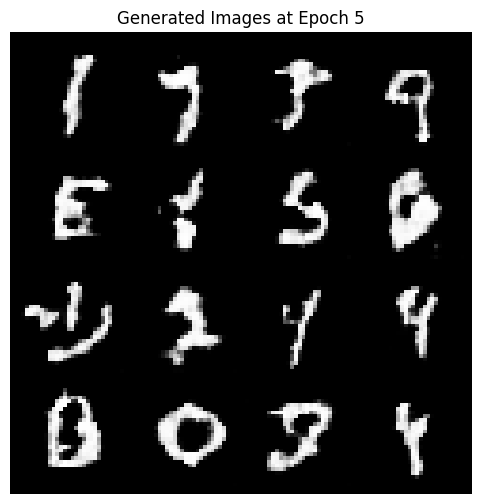

Epoch [5/2] Batch [400/938] Loss D: 0.1756Loss G: 5.3163


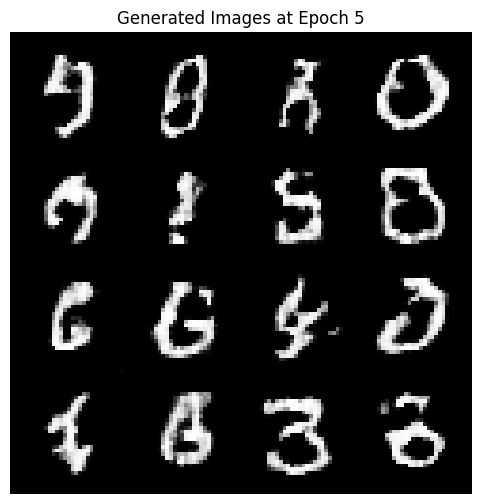

Epoch [5/2] Batch [600/938] Loss D: 0.0834Loss G: 5.1412


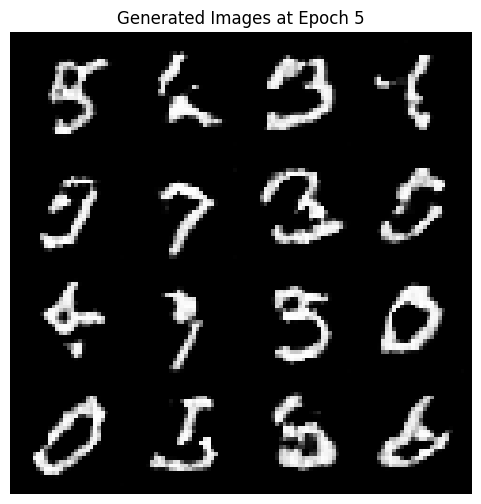

Epoch [5/2] Batch [800/938] Loss D: 0.0893Loss G: 6.6079


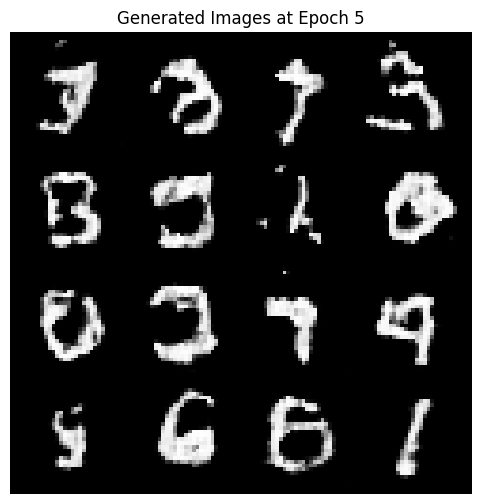

Epoch [6/2] Batch [0/938] Loss D: 0.0961Loss G: 5.5160


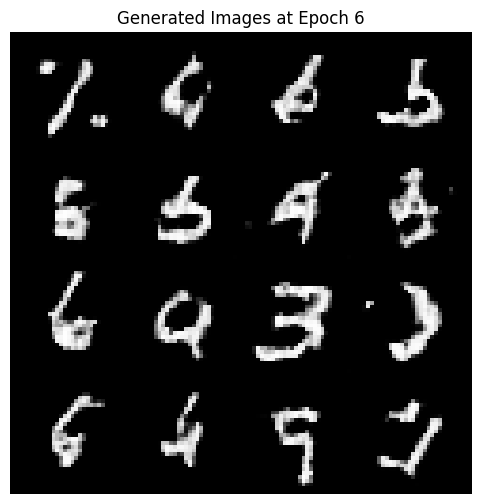

Epoch [6/2] Batch [200/938] Loss D: 0.0896Loss G: 4.8102


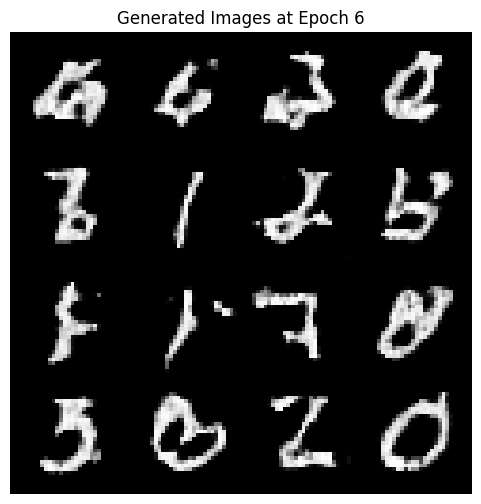

Epoch [6/2] Batch [400/938] Loss D: 0.2414Loss G: 5.2956


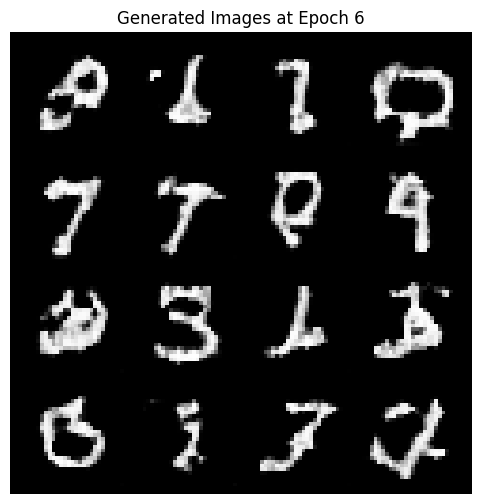

Epoch [6/2] Batch [600/938] Loss D: 0.1889Loss G: 4.9930


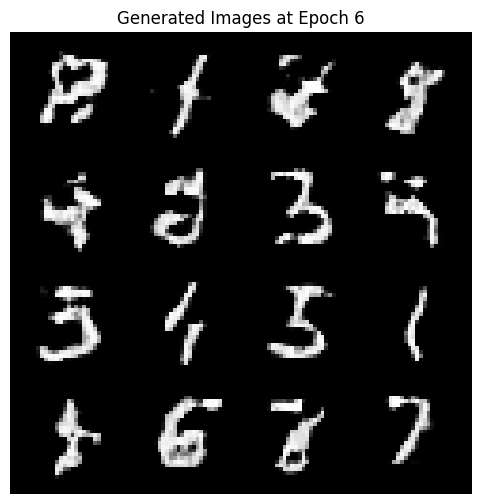

Epoch [6/2] Batch [800/938] Loss D: 0.1518Loss G: 6.1479


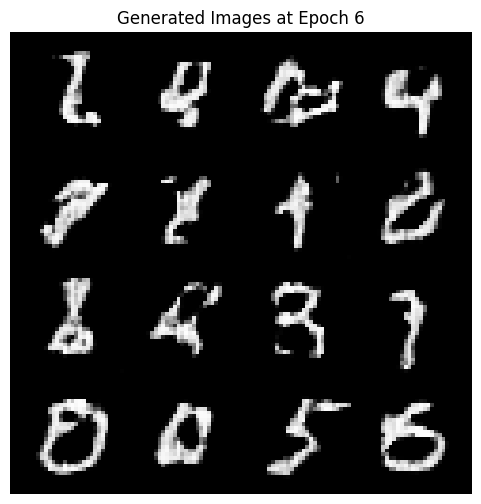

Epoch [7/2] Batch [0/938] Loss D: 0.1211Loss G: 3.9261


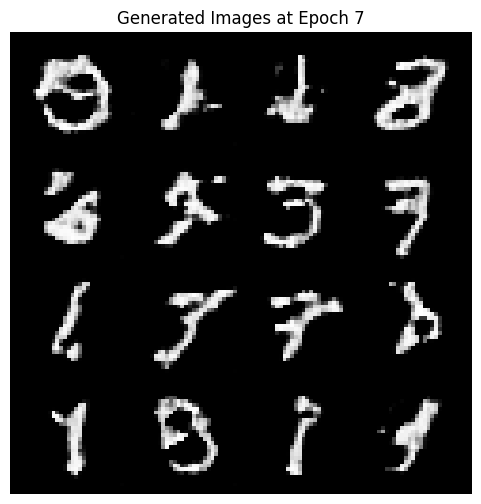

Epoch [7/2] Batch [200/938] Loss D: 0.1729Loss G: 5.1030


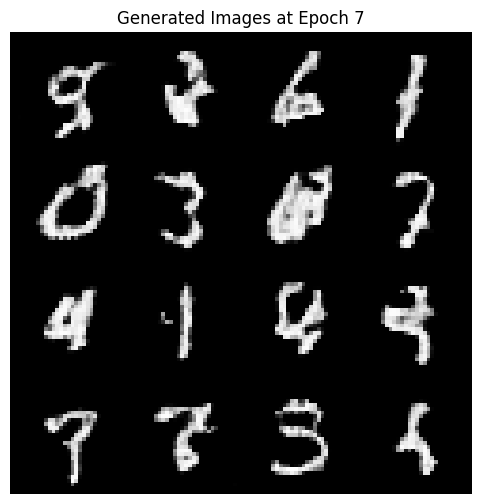

Epoch [7/2] Batch [400/938] Loss D: 0.1255Loss G: 5.3715


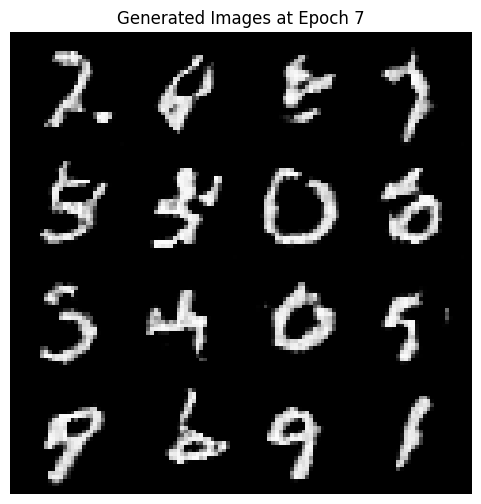

Epoch [7/2] Batch [600/938] Loss D: 0.0804Loss G: 5.6219


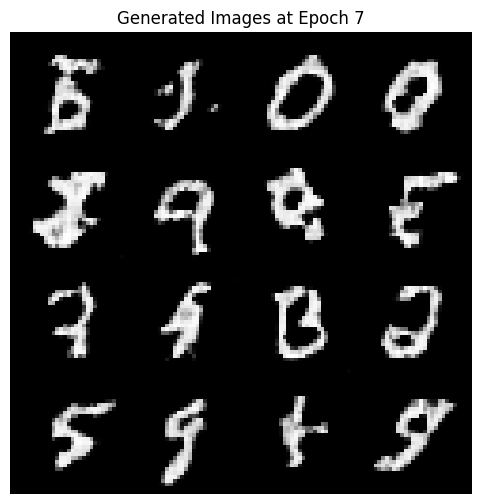

Epoch [7/2] Batch [800/938] Loss D: 0.0703Loss G: 6.0254


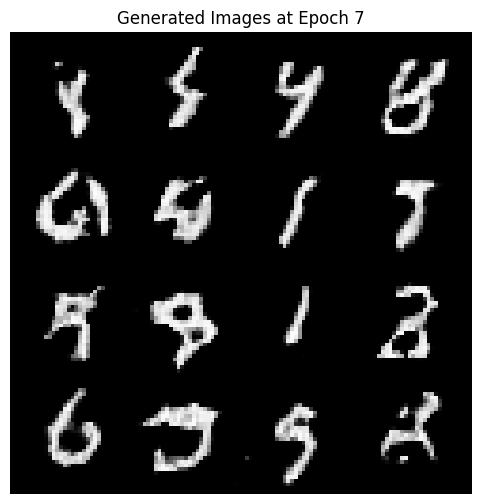

Epoch [8/2] Batch [0/938] Loss D: 0.1509Loss G: 5.2068


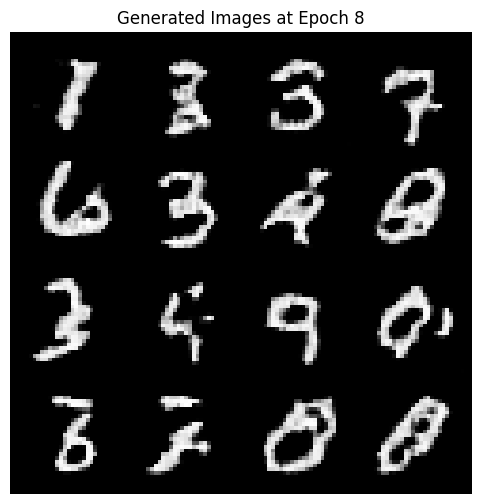

Epoch [8/2] Batch [200/938] Loss D: 0.2179Loss G: 5.7542


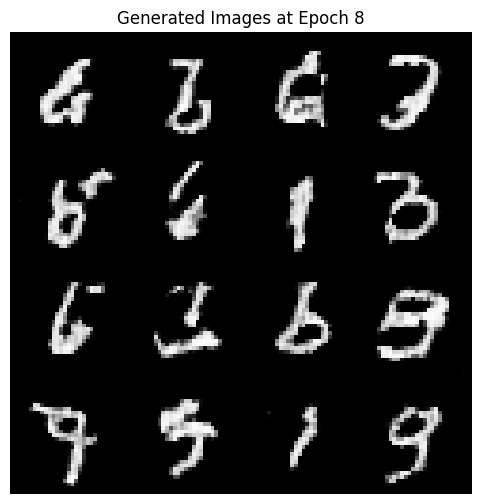

Epoch [8/2] Batch [400/938] Loss D: 0.0911Loss G: 6.6226


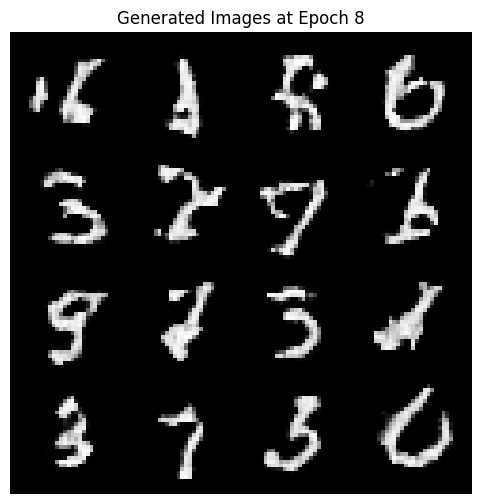

Epoch [8/2] Batch [600/938] Loss D: 0.1185Loss G: 5.3719


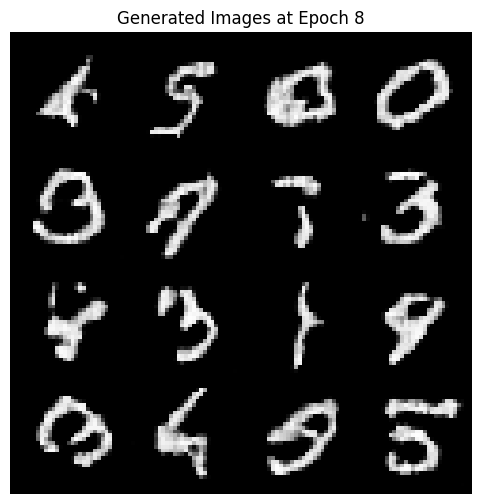

Epoch [8/2] Batch [800/938] Loss D: 0.3306Loss G: 4.7150


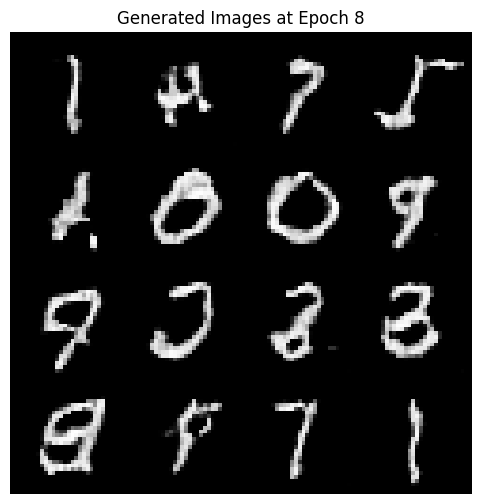

Epoch [9/2] Batch [0/938] Loss D: 0.1438Loss G: 6.6969


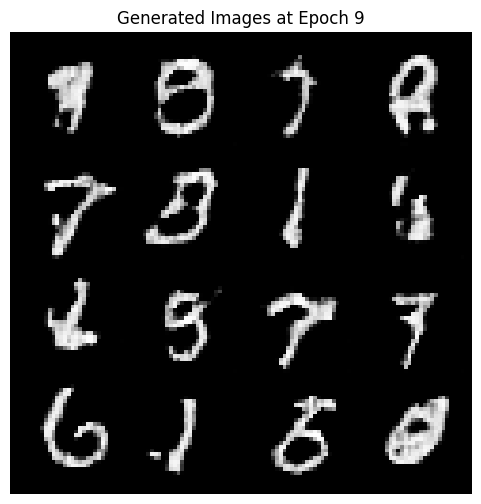

Epoch [9/2] Batch [200/938] Loss D: 0.0668Loss G: 5.7109


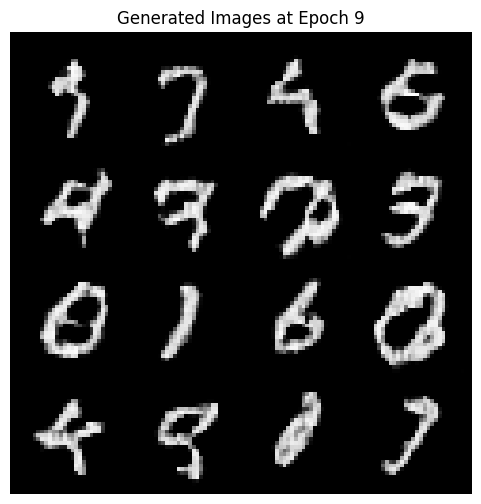

Epoch [9/2] Batch [400/938] Loss D: 0.0521Loss G: 4.7007


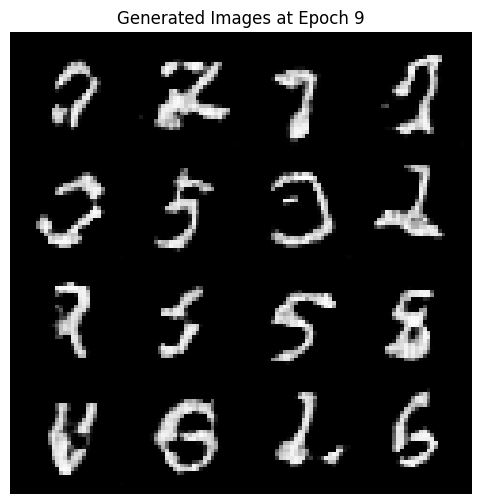

Epoch [9/2] Batch [600/938] Loss D: 0.0747Loss G: 6.8613


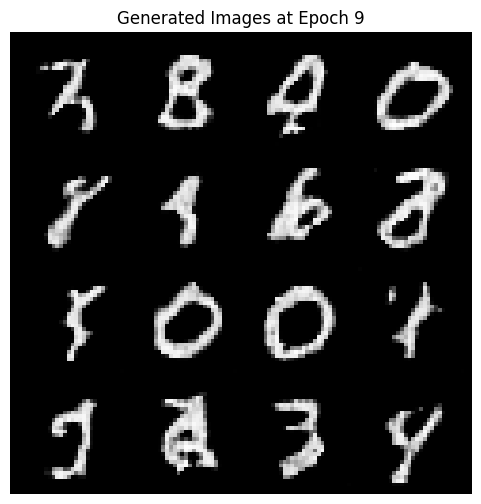

Epoch [9/2] Batch [800/938] Loss D: 0.0635Loss G: 6.3763


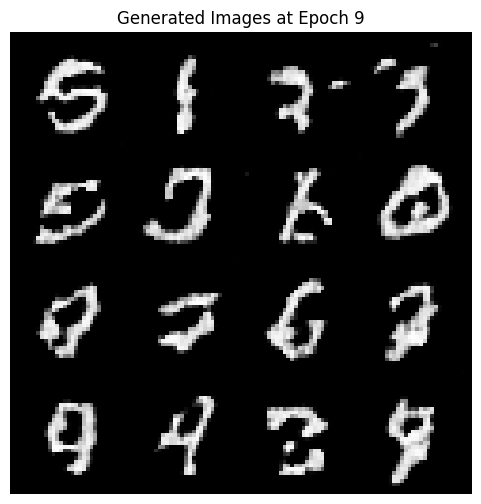

Epoch [10/2] Batch [0/938] Loss D: 0.0393Loss G: 5.7423


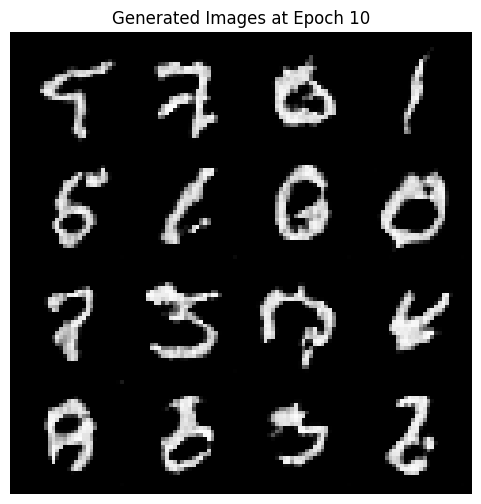

Epoch [10/2] Batch [200/938] Loss D: 0.0392Loss G: 6.4387


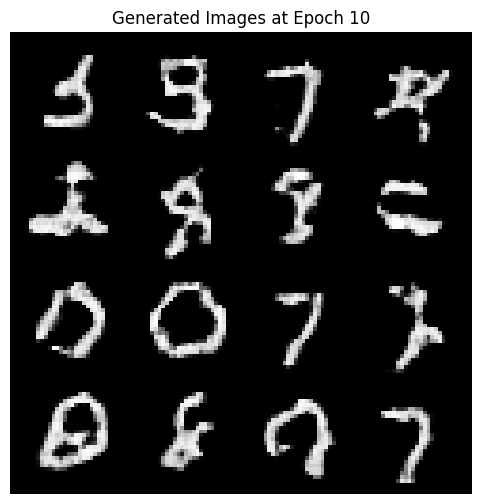

Epoch [10/2] Batch [400/938] Loss D: 0.0821Loss G: 6.6815


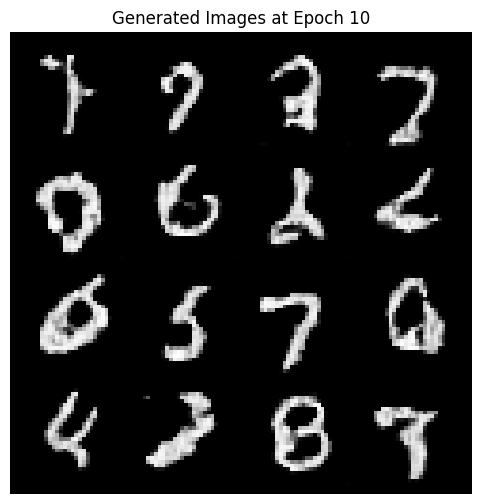

Epoch [10/2] Batch [600/938] Loss D: 0.0244Loss G: 8.3207


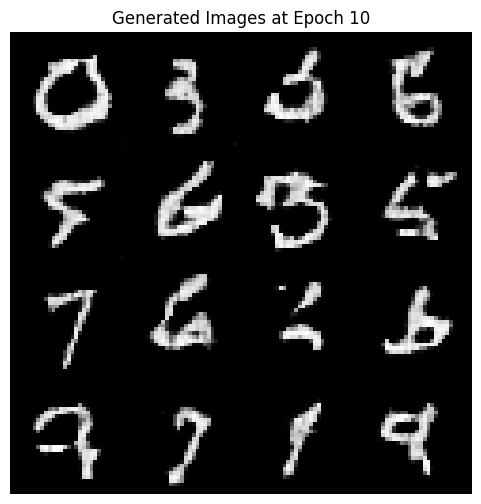

Epoch [10/2] Batch [800/938] Loss D: 0.0201Loss G: 6.4464


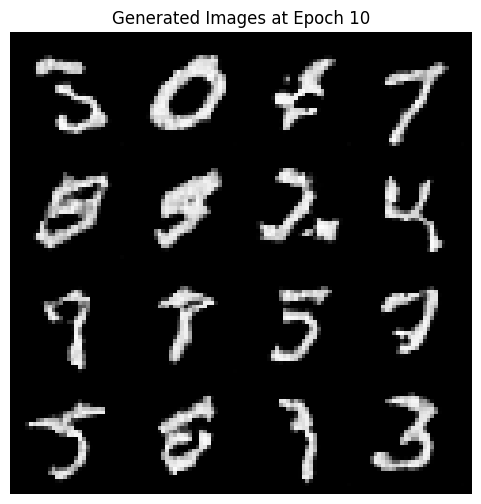

In [54]:
for t in range(10):
    for idx, (images, _) in enumerate(train_loader):
        # discrimintor training
        z_size = torch.zeros(BATCH_SIZE, Z_DIM)
        z_noise = torch.randn_like(z_size)
        z_noise = z_noise.view(BATCH_SIZE, z_noise.shape[0], 1, 1)
        fake_images = generator(z_noise)

        y_pred_fake = discriminator(fake_images)
        y_pred_real = discriminator(images)

        real_labels = torch.ones(y_pred_real.shape[0], 1)
        fake_labels = torch.zeros(y_pred_fake.shape[0], 1)

        d_loss = criterion(y_pred_real, real_labels) + criterion(y_pred_fake,fake_labels )

        # sgd
        discriminator.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # generator training
        z_size = torch.zeros(BATCH_SIZE, Z_DIM)
        z_noise = torch.randn_like(z_size)
        z_noise = z_noise.view(BATCH_SIZE, z_noise.shape[0], 1, 1)
        fake_images = generator(z_noise)

        y_pred_fake = discriminator(fake_images)
        g_loss = criterion(y_pred_fake, torch.ones(y_pred_fake.shape[0], 1))

        generator.zero_grad()
        g_loss.backward()
        optimizer_g.step()

        if idx % 200 == 0:
            print(
                f"Epoch [{t+1}/{epochs}] Batch [{idx}/{len(train_loader)}] "
                f"Loss D: {d_loss.item():.4f}"
                f"Loss G: {g_loss.item():.4f}"
            )
            show_generated_images(generator, t+1, Z_DIM)

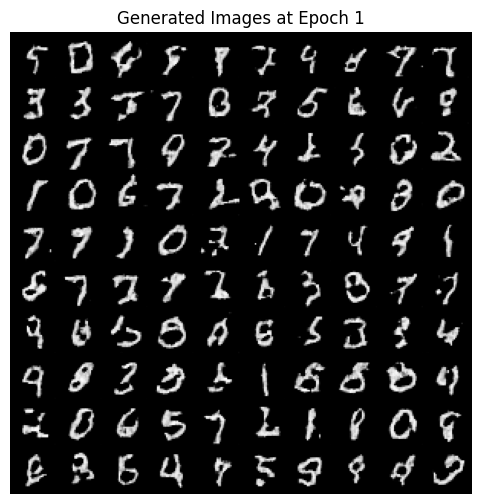

In [59]:
show_generated_images(generator, 1, Z_DIM, 100)